#Data Source and Description

##1. Import packages and mount Colab

In [52]:
#Import packages
import pandas as pd
import numpy as np

#Import viz packages
import matplotlib.pyplot as plt
import seaborn as sns

#Import linear model package
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


#Import decision tree packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [53]:
#Mount the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Read CSV URL

In [54]:
cvd_data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

##3. Check cvd Dataset

In [55]:
# Check headers
cvd_data.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [56]:
# Describe dataset
cvd_data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [57]:
#Info
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [58]:
#Check NULL value
cvd_data.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

##4. Seperate train and test dataset

In [59]:
cvd_data.cvd_4types.value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

In [60]:
y = cvd_data.cvd_4types

In [61]:
x = cvd_data.drop(['cvd_4types'], axis = 1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#Part 1: Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible.

In [71]:
# fit (train) the logistic regression classifier
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg', random_state=101,penalty='l2')
# fit the model with data
fitted_model = clf.fit(x_train, y_train)
# Prediction
y_pred = clf.predict(x_test)

#Part 2: Display the feature importance of all the features sorted in the order of decreasing influence on the CVD Risk

In [72]:
m = LogisticRegression()
m.fit(x_train, y_train)

#The estimated coefficients will all be around 1:
features = np.std(x_train,0)*m.coef_[0]
features.sort_values(ascending=False)
# higher value of coefficients will imply larger influence of the corresponding features on the outcome

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


waist           0.969948
educat          0.265209
tired25         0.149438
age_s1          0.128878
bend25          0.112773
parrptdiab      0.043810
srhype          0.038884
cgpkyr          0.007515
happy25        -0.016069
mstat          -0.066054
tea15          -0.069895
neck20         -0.095448
av_weight_kg   -0.108929
race           -0.175821
hlthlm25       -0.341463
hip            -0.417121
dtype: float64

According to the result, the most important features are Waist, Educat, and Tired25, etc.

#Part 3 Evaluate the performance of your model, explain the performance and draw a meaningful conclusion

In [75]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[206, 209],
       [ 88, 470]])

Text(0.5, 257.44, 'Predicted label')

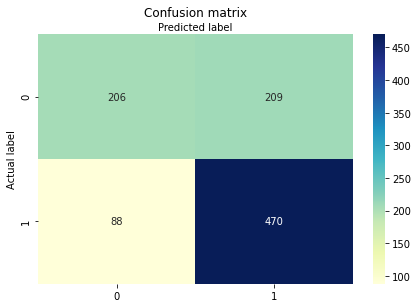

In [76]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
# Precision, Recall, F1-Score, Support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       415
           1       0.69      0.84      0.76       558

    accuracy                           0.69       973
   macro avg       0.70      0.67      0.67       973
weighted avg       0.70      0.69      0.68       973



In [82]:
#Accuracy score of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#AUC of the model
print('AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy: 0.6947584789311408
AUC Score: 0.6693397244893552


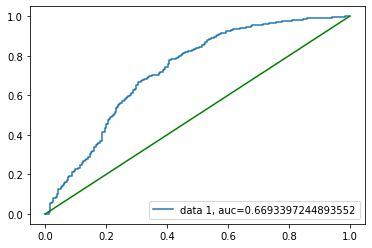

In [87]:
auc = roc_auc_score(y_test, y_pred)
# Plot the ROC curve based on auc score
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'g-')
plt.legend(loc=4)
plt.show()